In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [30]:
continents = pd.read_csv('../data/continents.csv')
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [31]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [32]:
gdp_df = gdp_df.rename(columns={'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

In [33]:
gdp_df.head()
# checking to see if dropping and renaming worked

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [8]:
gdp_df.shape
# trying different ways to get columns and rows
# this gives rows, columns

(7662, 3)

In [9]:
gdp_df.shape[0]
# gives rows

7662

In [10]:
gdp_df.shape[1]
# gives columns

3

In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [12]:
gdp_df.count()
# number of values? in each columns?

Country           7662
Year              7662
GDP_Per_Capita    7662
dtype: int64

In [13]:
len(gdp_df.index)
# number of rows ?

7662

In [14]:
len(gdp_df.axes[0])
# gives the rows

7662

In [15]:
# gives the columns 
len(gdp_df.axes[1])

3

In [16]:
len(gdp_df)
# rows

7662

In [17]:
len(gdp_df.columns)
# columns

3

In [20]:
gdp_df.size
# not what I am looking for

22986

In [24]:
# leaving cell if need to change the data type at this point I dont think it needs to be changed 

Question: How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.
- rows: 7662
- columns: 3 (not including the index(not sure if that is counted))
- data types: country - object, year - int64, gdp_per_capita - float64
- I dont think the types need to be changed at this time.
t64

In [59]:
gdp_df['Year'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006',
       '2005', '2004', '2003', '2002', '2022', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990'], dtype=object)

In [60]:
gdp_df['Year'].min()

'1990'

In [61]:
gdp_df['Year'].max()

'2022'

In [81]:
gdp_df['Year'].value_counts(ascending = True) 

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2007    237
2006    237
2008    238
2009    239
2010    239
2011    240
2012    240
2021    241
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
Name: count, dtype: int64

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?
   - the number of observations per year were increasing until 2013 where it stays the same till 2020, then decreases in 2021 to 241, and again in 2022 to 232. 


In [41]:
gdp_df['Country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
 

In [45]:
gdp_df['Country'].nunique()

242

In [71]:
gdp_df['Country'].value_counts(ascending = True).head(10)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
Cayman Islands               16
Nauru                        19
Afghanistan                  20
SÃ£o TomÃ© and Principe      22
Palau                        22
Name: count, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?
 - Do you have to be in the UN to be reporting this? Were these countries in the UN at that time of the reporting? 
 - Some of these are grouped by area and not country, were they too small to be reported by themselfs in some years and then they are grouped into the area.
 - Some of the places listed are cities and not countries

In [67]:
gdp2021 = gdp_df.loc[gdp_df['Year'] == '2021']

In [72]:
gdp2021.descr

,GDP_Per_Capita
count,241.000000
mean,20711.570080
std,20916.978968
min,714.066712
25%,5044.196028
50%,13754.802423
75%,30974.370692
max,115683.493708


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

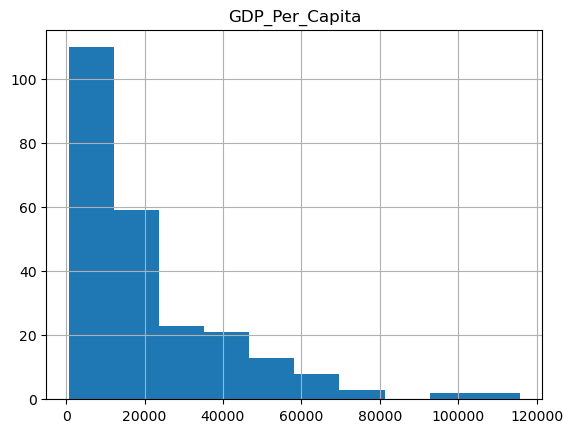

In [88]:
gdp2021.hist()

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

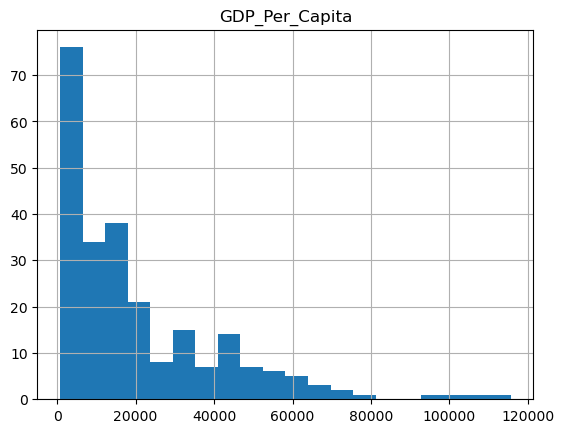

In [89]:
gdp2021.hist(bins = 20)

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

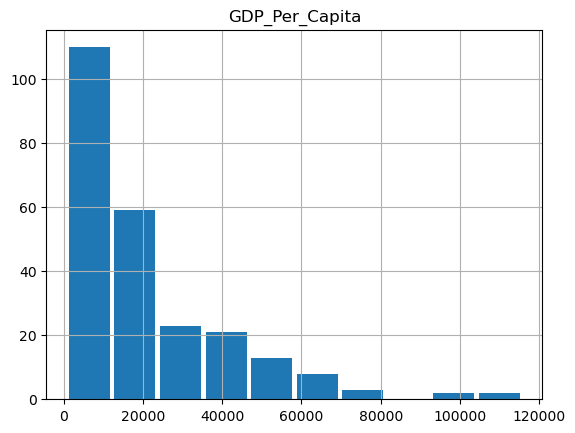

In [90]:
gdp2021.hist(rwidth = 0.9)
# puts spaces inbetween the columns

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

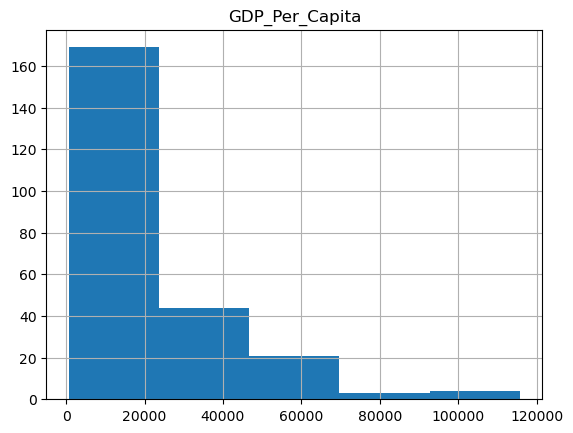

In [97]:
gdp2021.hist(bins = 5)

In [98]:
gdp2021.sort_values('GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


In [99]:
gdp2021.sort_values('GDP_Per_Capita').tail()

,Country,Year,GDP_Per_Capita
680,Bermuda,2021,78570.489515
5745,Qatar,2021,92862.571798
3278,Ireland,2021,102785.490239
6107,Singapore,2021,107741.118436
4147,Luxembourg,2021,115683.493708
